In [1]:
import numpy as np
import math
import pandas as pd
from timeit import default_timer as timer  
import datetime

from pandas_datareader import data
import pandas_datareader as web
import seaborn as sns

import datetime
from datetime import timezone
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('dark_background')

from scipy.optimize import minimize
from scipy import stats
from random import sample
import statsmodels.api as sm


import statsmodels
from IPython.display import display, clear_output

from pathlib import Path


In [2]:
DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_91_filtered_full_user_weights_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_glove_91_filtered_full_user_averaged.csv"
# DATASET_FILEPATH = "./Data Preprocessed/Dataset_sentiment_100K_91_glove_filtered_full.csv"

TRADING_STRATEGY_FILEPATH = './Trading Strategy'

## Inspecting the Datasets

In [1]:
DATASET_FILEPATHS = ["./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_2g_user_weights.csv"
,"./Data Preprocessed/Dataset_sentiment_BERT_trainable_full.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights.csv"
,"./Data Preprocessed/Dataset_sentiment_100K_glove_filtered_full_user_weights_user_averaged.csv"]

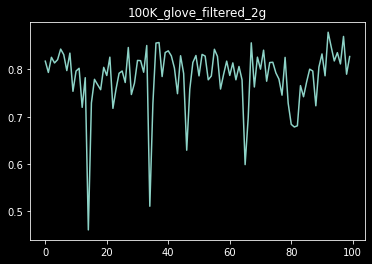

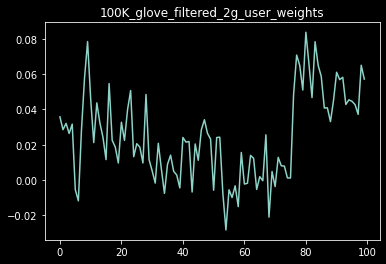

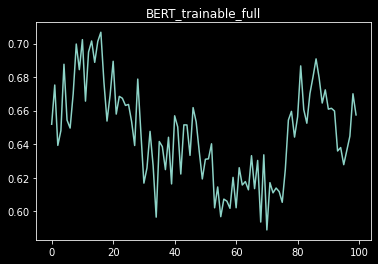

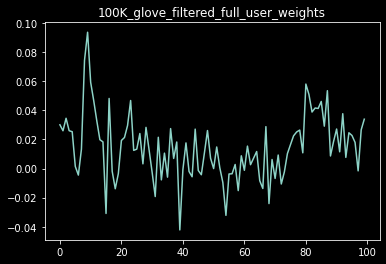

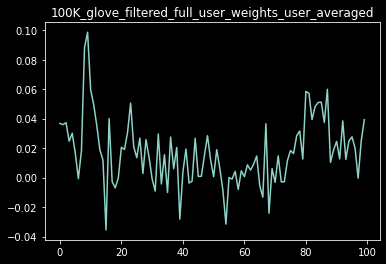

In [10]:
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    plt.title(filepath[38:-4])
    plt.plot(df['Bitcoin'][1200:1300].values)
    plt.show()

In [11]:
for filepath in DATASET_FILEPATHS:
    df = pd.read_csv(filepath, index_col = 0)
    format = "%Y-%m-%d %H"
    df.index = [datetime.strptime(i, format) for i in df.index]
    #BTC price data of the next hour standarized
    Y = pd.DataFrame(df['Open']).astype(float)
    #Y = dataset_standarization(Y)

    #Textual data ('Bitcoin' topic popularity) of the last hour standarized
    X = pd.DataFrame(df['Bitcoin_median']).astype(float)
    #X = dataset_standarization(X)
    Y.index = X.index

    X = sm.add_constant(X)

    model = sm.OLS(Y, X, missing = 'drop').fit()
    print(filepath[38:-4])
    print(model.summary())

100K_glove_filtered_2g
                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.716
Date:                Thu, 24 Jun 2021   Prob (F-statistic):              0.190
Time:                        00:30:47   Log-Likelihood:                -13248.
No. Observations:                1428   AIC:                         2.650e+04
Df Residuals:                    1426   BIC:                         2.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5495.

## Import Sentiment values

In [3]:
df = pd.read_csv(DATASET_FILEPATH, index_col = 0)
format = "%Y-%m-%d %H"
df.index = [datetime.strptime(i, format) for i in df.index]
df

,Bitcoin,Bitcoin_median,Open
2017-09-13 01:00:00,0.814122,0.891900,4128.005439
2017-09-13 02:00:00,0.812894,0.850564,4066.801167
2017-09-13 03:00:00,0.853220,0.846102,3999.225167
2017-09-13 04:00:00,0.838326,0.846102,3959.409667
2017-09-13 05:00:00,0.782210,0.815073,3995.046667
...,...,...,...
2019-01-22 18:00:00,0.706585,0.819227,3584.926897
2019-01-22 19:00:00,0.889864,0.935381,3585.858545
2019-01-22 20:00:00,0.687378,0.781042,3585.295893
2019-01-22 21:00:00,0.767968,0.853416,3579.910755


### Anlytics on Median vs mean

In [4]:
df['date'] = df.index.map(lambda x : str(x)[:-8])
df['place'] = range(0,1413)
df

,Bitcoin,Bitcoin_median,open,close,date,place
2017-09-13 01:00:00,0.586789,0.623524,4142.25,4105.13,2017-09-13,0
2017-09-13 02:00:00,0.607135,0.631940,4101.49,4026.02,2017-09-13,1
2017-09-13 03:00:00,0.586056,0.623793,4035.48,3945.00,2017-09-13,2
2017-09-13 04:00:00,0.564152,0.610086,3951.62,4010.00,2017-09-13,3
2017-09-13 05:00:00,0.639324,0.745114,4009.01,3975.99,2017-09-13,4
...,...,...,...,...,...,...
2019-01-22 18:00:00,0.671039,0.809904,3591.48,3590.67,2019-01-22,1408
2019-01-22 19:00:00,0.659036,0.802012,3589.30,3579.28,2019-01-22,1409
2019-01-22 20:00:00,0.651866,0.825288,3579.28,3585.51,2019-01-22,1410
2019-01-22 21:00:00,0.667588,0.813837,3586.72,3574.26,2019-01-22,1411


In [81]:
k = pd.DataFrame(df.groupby(['date']).Bitcoin_median.apply(np.mean).values)
index = df.groupby(['date']).place.first()
l = pd.DataFrame(df.groupby(['date']).Bitcoin.apply(np.mean).values)

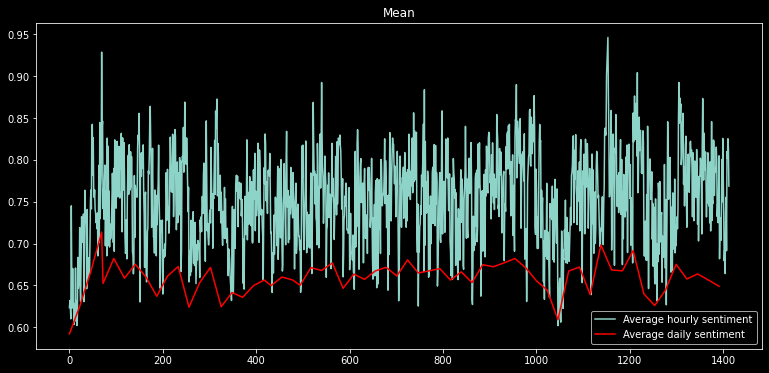

In [90]:
fig = plt.figure(figsize=(13, 6))
plt.title("Mean")
x_axis = range(0,1413)

plt.plot(x_axis,df.Bitcoin_median, label = 'Average hourly sentiment')
plt.plot(index,df.groupby(['date']).Bitcoin.apply(np.mean),color = "red", label = 'Average daily sentiment')
plt.legend()
plt.show()

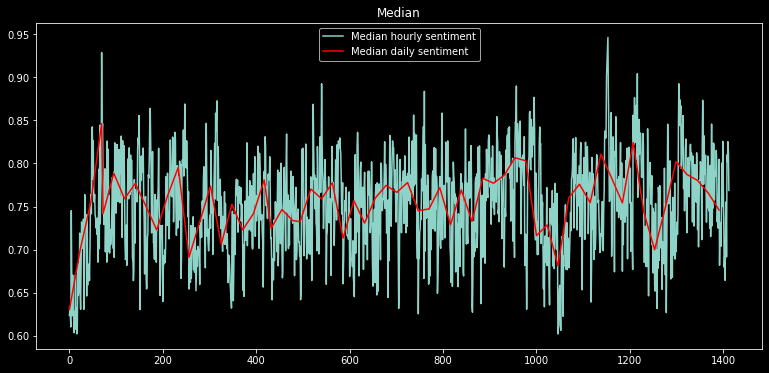

In [93]:
fig = plt.figure(figsize=(13, 6))
plt.title("Median")
x_axis = range(0,1413)

plt.plot(x_axis,df.Bitcoin_median, label = 'Median hourly sentiment')
plt.plot(index,df.groupby(['date']).Bitcoin_median.apply(np.median),color = "red", label = 'Median daily sentiment')
plt.legend()
plt.show()

## Trading Strategy Backtesting <a class="anchor" id="section_5_3"></a>

In [4]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(TRADING_STRATEGY_FILEPATH)
sys.path.append('./Data Preprocessed')
from custom_trading_engine import customNLP
from signals import *
from strategies import *
from data_import import BTC_total

In [5]:
df1 = pd.read_csv('./Data/bitcoinity_data.csv', index_col = False)
format = "%Y-%m-%d %H:%M:%S"
df1.index = df1['Time'].apply(lambda x: str(x)[:-4])
df1.index = [datetime.strptime(i, format) for i in df1.index]
df1.columns = ['date','spreads']
df1
#algo.add_spreads(df1['spreads'])

,date,spreads
2014-02-15,2014-02-15 00:00:00 UTC,1.357314
2014-02-16,2014-02-16 00:00:00 UTC,1.148620
2014-02-17,2014-02-17 00:00:00 UTC,1.202376
2014-02-18,2014-02-18 00:00:00 UTC,0.908324
2014-02-19,2014-02-19 00:00:00 UTC,0.827178
...,...,...
2021-06-19,2021-06-19 00:00:00 UTC,0.004483
2021-06-20,2021-06-20 00:00:00 UTC,0.004551
2021-06-21,2021-06-21 00:00:00 UTC,0.009002
2021-06-22,2021-06-22 00:00:00 UTC,0.011333


In [14]:
# signal = Signal2(df['Bitcoin'])
# strategy = BitcoinNLPStrategy2()
# strategy.add_signal(signal)
# algo = customNLP(100000, df[['Open','Open']], strategy)
# #algo.set_stoploss(0.01)
# #algo.add_spreads(df1['spreads'])
# algo.run(split = True)

In [17]:
signal = Signal3(df['Bitcoin'])
strategy = BitcoinNLPStrategy()
strategy.add_signal(signal)
algo = customNLP(1, df[['Open','Open']], strategy)
#algo.set_stoploss(0.01)
#algo.add_spreads(df1['spreads'])
algo.run(split = True)

0
opening LONG position of  0.1  USD at  4066.801166666666  $
0
opening SHORT position of  0.24113581933792647  BTC at  3999.2251666666666  $
0
opening LONG position of  0.29705036091936265  USD at  3995.046666666667  $
0
opening SHORT position of  0.24640203585149156  BTC at  4005.1322641509432  $
0
opening LONG position of  0.18721834711637886  USD at  3951.8985  $
0
opening SHORT position of  0.12443108989677787  BTC at  3969.537118644068  $
0
opening LONG position of  0.10760761466851873  USD at  3839.3781666666655  $
0
opening SHORT position of  0.08427521407744237  BTC at  3833.9163333333327  $
0
opening LONG position of  0.18275872354618494  USD at  3868.011  $
0
opening SHORT position of  0.23146763056992853  BTC at  3794.985666666667  $
0
opening LONG position of  0.17250144002661555  USD at  3820.265666666667  $
0
opening SHORT position of  0.12666410258762523  BTC at  3903.897333333333  $
0
opening LONG position of  0.11178114547678186  USD at  3885.2776666666673  $
0
openin

0
opening SHORT position of  0.19895077849801965  BTC at  7939.110666666668  $
0
opening LONG position of  0.07205104540607735  USD at  7952.1074576271185  $
0
opening SHORT position of  0.035607448292400645  BTC at  7950.796610169493  $
0
opening LONG position of  0.1554580036914735  USD at  7981.692833333333  $
0
opening SHORT position of  0.2510001341286293  BTC at  8096.2221666666655  $
0
opening LONG position of  0.2862027654439743  USD at  8242.049333333332  $
0
opening SHORT position of  0.2904669505440508  BTC at  8216.260833333334  $
0
opening LONG position of  0.16160538115309364  USD at  8248.96033898305  $
closing  0.03785793439514115  BTC at  8248.96033898305  $
0
opening LONG position of  0.11667696508838211  USD at  10564.64233333333  $
0
opening SHORT position of  0.14957051970746665  BTC at  10130.142833333332  $
0
opening LONG position of  0.2179498273568305  USD at  10157.093666666666  $
0
opening SHORT position of  0.2004867532887959  BTC at  10229.641333333331  $
0

0
opening LONG position of  0.10772187488822366  USD at  6946.457758620691  $
0
opening SHORT position of  0.07999297350921164  BTC at  6979.768833333334  $
0
opening LONG position of  0.3044003037601273  USD at  7006.639830508474  $
0
opening SHORT position of  0.28593951831749387  BTC at  7084.959322033899  $
0
opening LONG position of  0.035357955867081056  USD at  6972.5858333333335  $
0
opening SHORT position of  0.018082887203814218  BTC at  7028.524666666666  $
closing  -0.01205927813731444  BTC at  7013.597241379312  $
0
opening LONG position of  0.11630081399538157  USD at  8173.781499999999  $
0
opening SHORT position of  0.2716288272570609  BTC at  8156.707166666668  $
0
opening LONG position of  0.35993256105533733  USD at  8090.290499999999  $
0
opening SHORT position of  0.2654295681377564  BTC at  8102.983166666666  $
0
opening LONG position of  0.17373321173268697  USD at  7963.805833333333  $
0
opening SHORT position of  0.14624875127578388  BTC at  8008.669833333333  

0
opening LONG position of  0.10004481222760114  USD at  6689.229666666666  $
0
opening SHORT position of  0.09177077432375734  BTC at  6702.05  $
0
opening LONG position of  0.2508137770237735  USD at  6705.717833333334  $
0
opening SHORT position of  0.3540378998297502  BTC at  6711.9445  $
0
opening LONG position of  0.2204894679742723  USD at  6738.6095000000005  $
0
opening SHORT position of  0.10837307191643827  BTC at  6725.860499999999  $
0
opening LONG position of  0.25706490667281545  USD at  6724.9023333333325  $
0
opening SHORT position of  0.22344207424238904  BTC at  6710.66210526316  $
closing  -0.009092180037115954  BTC at  6730.373666666666  $
0
opening LONG position of  0.10477625836794063  USD at  6333.060666666665  $
0
opening SHORT position of  0.25186607605913225  BTC at  6328.387333333333  $
0
opening LONG position of  0.20760227156686373  USD at  6301.089833333333  $
0
opening SHORT position of  0.24279269387520364  BTC at  6296.2565  $
0
opening LONG position o

0
opening SHORT position of  0.062222596547468034  BTC at  6403.422040816326  $
0
opening LONG position of  0.30185496893340164  USD at  6393.782884615384  $
0
opening SHORT position of  0.32413750140855974  BTC at  6390.821132075471  $
0
opening LONG position of  0.1846221098300932  USD at  6393.1272881355935  $
0
opening SHORT position of  0.19895976025042023  BTC at  6411.997333333334  $
0
opening LONG position of  0.1244499422929285  USD at  6417.856206896551  $
0
opening SHORT position of  0.09773292061310238  BTC at  6412.322931034481  $
0
opening LONG position of  0.21518385463807574  USD at  6394.296440677966  $
closing  0.15414183227201195  BTC at  6502.679999999999  $
0
opening LONG position of  0.10548519060911835  USD at  6488.024137931034  $
0
opening SHORT position of  0.10557703653756687  BTC at  6487.438269230769  $
0
opening LONG position of  0.22920022613684862  USD at  6481.607118644069  $
0
opening SHORT position of  0.24750560717366624  BTC at  6502.862142857143  $

0
opening SHORT position of  0.14141993040757367  BTC at  3533.44387755102  $
0
opening LONG position of  0.11667140431794243  USD at  3537.163571428572  $
0
opening SHORT position of  0.17881983136908414  BTC at  3529.263050847458  $
0
opening LONG position of  0.21021086464873434  USD at  3532.721607142857  $
0
opening SHORT position of  0.13798465913924346  BTC at  3543.166724137931  $
0
opening LONG position of  0.2009549403524017  USD at  3533.937543859649  $
0
opening SHORT position of  0.19147295788765784  BTC at  3679.172033898305  $
0
opening LONG position of  0.059787320679288006  USD at  3677.4666666666662  $
0
opening SHORT position of  0.04812868028429827  BTC at  3662.714915254237  $
0
opening LONG position of  0.09917227247364196  USD at  3663.879298245614  $
closing  0.08318505926786343  BTC at  3666.895961538462  $
0
opening LONG position of  0.10558083323293799  USD at  3671.7594230769214  $
0
opening SHORT position of  0.24290712017016172  BTC at  3669.605227272727  

In [22]:
# signal = RandomSignal()
# strategy = BitcoinBNHStrategy()
# strategy.add_signal(signal)
# algo = customNLP(100000, df['Open'], strategy)
# #algo.set_stoploss(0.01)
# algo.run(split = True)

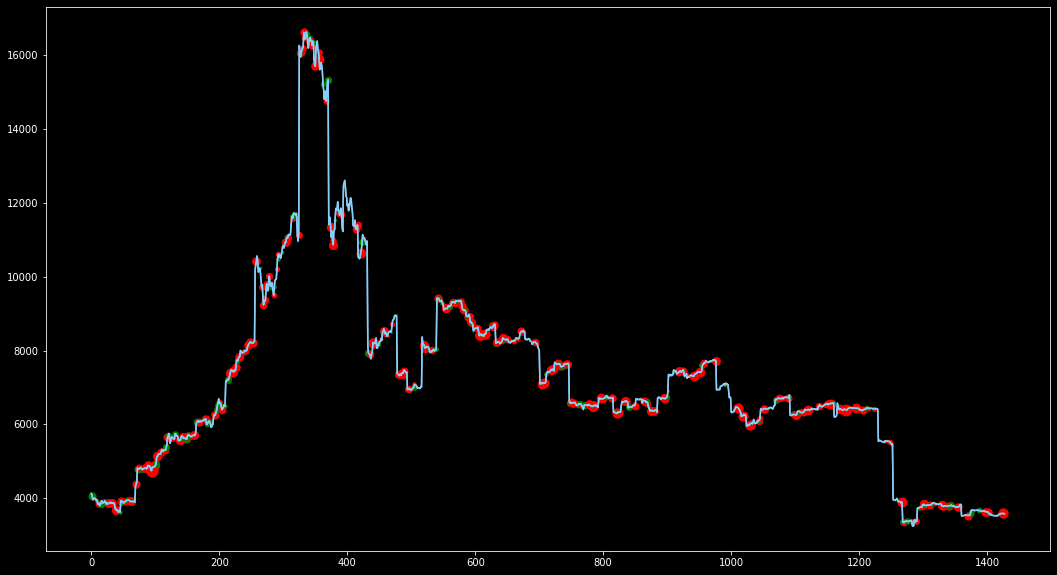

In [16]:
#plot trading history
algo.plot()

In [19]:
#a better plotting of trading history
btc = pd.read_csv('./BTC_full.csv', index_col = 0)
format = "%Y-%m-%d %H"
btc.index = [datetime.strptime(i, format) for i in btc.index]

algo.plot2(btc[:-1])

C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\custom_trading_engine.py:279: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sign'] = df['Position USD'].apply(np.sign)
C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\custom_trading_engine.py:280: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change'] = df['Position USD'].diff().fillna(1)
C:\Users\Konst\Desktop\PythonNotebooks\TradingNLP\./Trading Strategy\custom_trading_engine.py:281: UserWarning: Boolean Seri

In [19]:
algo.cash

9197477.631443977

In [33]:
print(algo.metrics.dropna().info(verbose= True))
algo.metrics.dropna().head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1350 entries, 2017-09-13 02:00:00 to 2019-01-22 22:00:00
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Position USD      1350 non-null   object
 1   Position BTC      1350 non-null   object
 2   Price USD         1350 non-null   object
 3   Cash USD          1350 non-null   object
 4   Portfolio Marked  1350 non-null   object
dtypes: object(5)
memory usage: 63.3+ KB
None


,Position USD,Position BTC,Price USD,Cash USD,Portfolio Marked
2017-09-13 02:00:00,-1.0,-0.000246,4066.801167,2.0,1.0
2017-09-13 03:00:00,-1.0,0.000331,4066.801167,2.0,3.324568
2017-09-13 04:00:00,-1.0,0.001648,4066.801167,2.0,8.525308
2017-09-13 05:00:00,-13.16343,-0.001647,3995.046667,15.16343,8.58404
2017-09-13 06:00:00,7.170163,0.000143,4005.132264,7.993266,8.56743


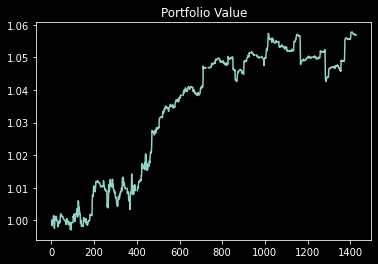

In [18]:
plt.title("Portfolio Value")
plt.plot(list(algo.metrics['Portfolio Marked']))
#plt.savefig('assetcurve.png')

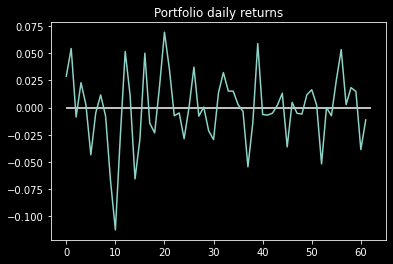

In [27]:
algo.metrics['date'] =  algo.metrics.index.map(lambda x : str(x)[:-8])
algo.metrics['hour'] =  algo.metrics.index.map(lambda x : str(x)[-8:])

plt.title("Portfolio daily returns")
daily_returns = algo.metrics.groupby(['date'])['Portfolio Marked'].first().pct_change().dropna().values
plt.hlines(0 ,0 ,daily_returns.shape[0])
plt.plot(daily_returns)

In [28]:
sr = ((np.mean(daily_returns)-0.035/365)/np.std(daily_returns)*math.sqrt(365))
sr

-0.5659529335940614

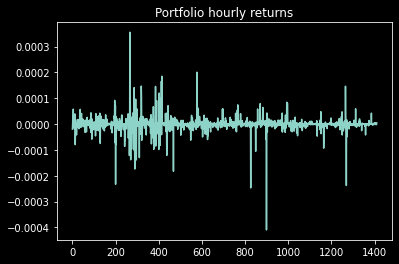

In [9]:
plt.title("Portfolio hourly returns")
returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values

plt.plot(returns)
plt.savefig('hourly_returns.png')

In [30]:
sr = ((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
sr

-0.31429848016803463

In [33]:
dates = list(set(algo.metrics.date.values))
hours = list(set(algo.metrics.hour.values))
heatm = pd.DataFrame(columns=sorted(hours), index = sorted(dates))
heatm2 = pd.DataFrame(columns=sorted(hours), index = sorted(dates))
for d in sorted(dates):
    for h in sorted(hours):
        if d + h in algo.metrics.index and algo.metrics.loc[d + h]['Position USD'] != 0:
            heatm2.loc[d][h] = algo.metrics.loc[d + h]['Position USD']/abs(algo.metrics.loc[d + h]['Position USD'])
            heatm.loc[d][h] = algo.metrics.loc[d + h]['Position USD']
        else:
            heatm.loc[d][h] = 0
heatm = heatm.fillna(0)
heatm2 = heatm2.fillna(0)
heatm2

,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2017-09-13,0,-1.0,1.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,...,-1.0,1.0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,0
2017-09-21,0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,...,-1.0,0.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,0
2017-09-26,0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,0
2017-10-07,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2017-10-10,0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,...,-1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-03,0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2019-01-04,0,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,0
2019-01-14,0,-1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,0
2019-01-15,0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0


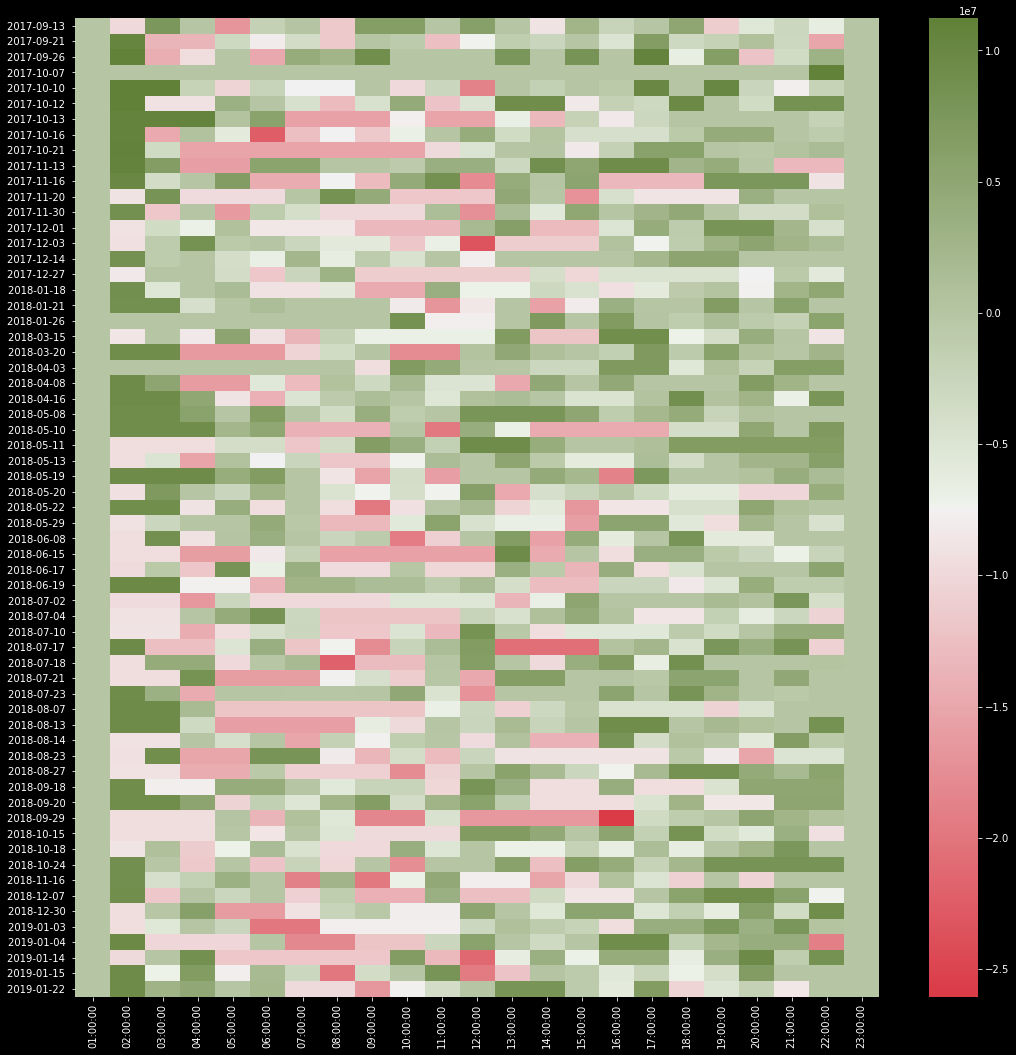

In [37]:
import seaborn as sns
import pandas as pd
import numpy as np

cmap = sns.diverging_palette(10, 110, s=75, l=50,
                                  n=9,as_cmap=True)


fig = plt.figure(figsize=(18, 18))
# Default heatmap
p1 = sns.heatmap(heatm, cmap = cmap)
plt.savefig('heatmap1.png')

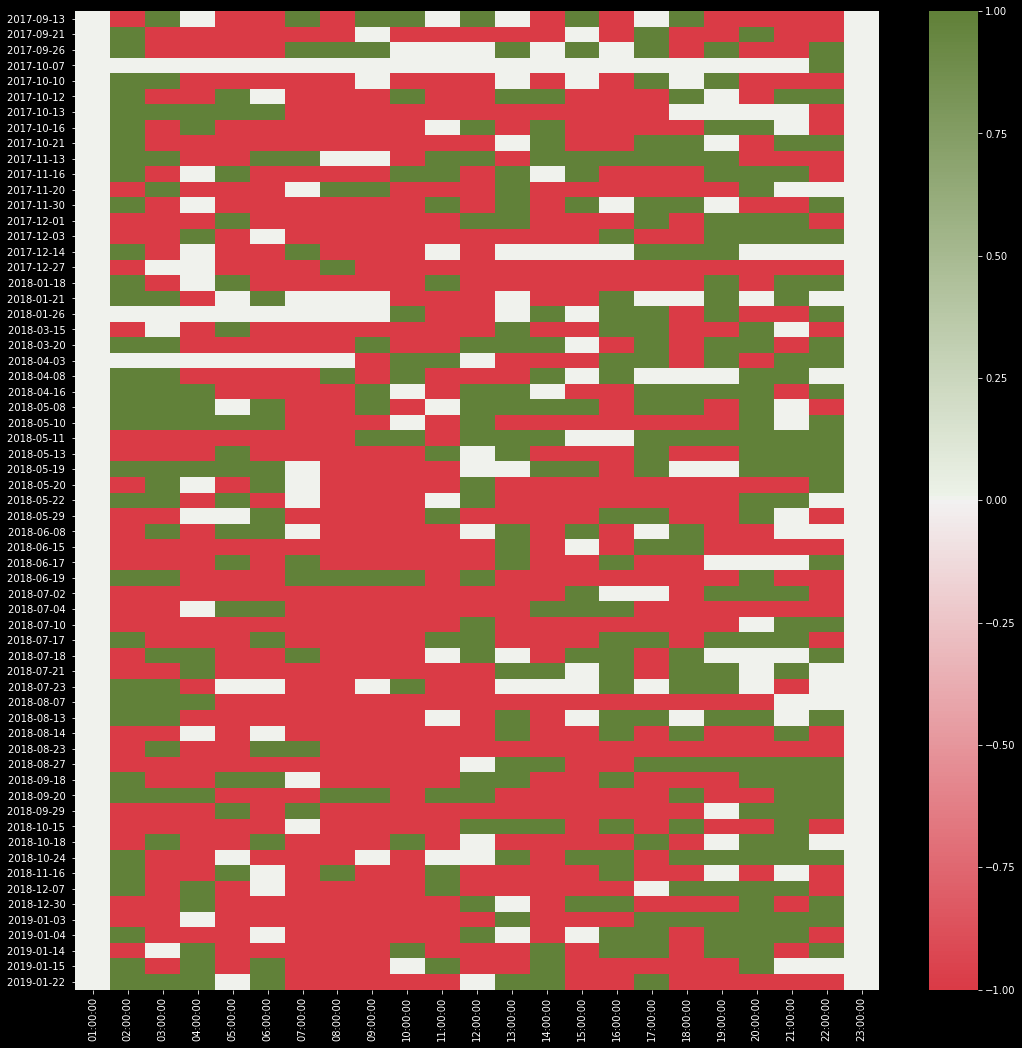

In [36]:
fig = plt.figure(figsize=(18, 18))
# Default heatmap
p1 = sns.heatmap(heatm2, cmap = cmap)
#plt.savefig('heatmap2.png')

In [ ]:
#best strategy play the opposite (with stoploss)
cash = []
for stop in range(1, 50):
    signal = Signal2(df['Bitcoin'])
    strategy = BitcoinNLPStrategy2()
    strategy.add_signal(signal)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(stop/1000)
    
    algo.run(split = True, verbose = False)
    cash.append(algo.cash)
#plt.plot(list(algo.metrics['Portfolio Marked']))

### Generate Random Strategies

In [ ]:
strategy = BitcoinRandomStrategy()
sr = []
for i in range(0,100):
    loading_bar(i, 99)
    algo = customNLP(100000, df['Open'], strategy)
    algo.set_stoploss(0.01)
    algo.run(split = True, verbose = False)
    returns = algo.metrics['Portfolio Marked'].pct_change().dropna().values
    sr.append((np.mean(returns)-0.035/24/365)/np.std(returns)*math.sqrt(365*24))
np.mean(sr)

In [ ]:
np.median(sr)

## Plotting and Testing

In [ ]:
#Prints a simple loading bar
def loading_bar(n,N, message = ''):
    prc  = math.floor(n/N*100)
    a = prc*'#'
    b = (100-prc)*'_'
    clear_output(wait=True)
    display('|' + a + b + '|' + str(prc) + '%' + " " + message)